In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:

import pandas as pd
df = pd.read_csv('CAS_LAB_GAINESIS_TOOL_TF_18000_TI_5000.csv', index_col=0)  

In [3]:
df

,NetSwitchingPower,Numberofnets,Numberofports,Numberofcells,Numberofsequentialcells,CombinationalSwitchingPower,CombinationalTotalPower,TotalDynamicPower,TotalSwitchingPower,TotalTotalPower,Label
Numberofreferences,,,,,,,,,,,
-0.000363,-0.019816,-0.013252,-0.003312,0.005040,0.014796,-0.000597,-0.021193,-0.011822,-0.020274,-0.015670,1
-0.009623,0.238019,0.288163,1.625763,0.213192,-0.078788,-0.077745,0.089861,0.055584,0.114047,-0.004555,1
-0.008165,-0.011867,-0.010736,-0.002650,0.060076,0.032304,0.018132,-0.014241,-0.017209,-0.021062,-0.020414,1
-0.012802,-0.005911,-0.003381,0.065094,0.092821,0.328620,0.330469,-0.005558,-0.008662,-0.007327,-0.013261,1
-0.019406,-0.022404,-0.020504,-0.023495,-0.109518,-0.048246,-0.048042,-0.024486,-0.015804,-0.021904,-0.019846,1
...,...,...,...,...,...,...,...,...,...,...,...
0.149041,0.023230,-0.027183,-0.020518,-0.019132,-0.018218,-0.012132,-0.019144,0.026803,-0.023641,-0.007674,0
-0.091749,-0.032097,-0.019040,-0.014640,-0.019584,-0.012950,-0.016942,-0.003435,-0.039285,-0.009717,-0.008711,0
0.130191,-0.007124,-0.022901,-0.021268,-0.012531,-0.016093,-0.017944,-0.016511,0.001626,-0.019763,-0.014316,0


In [4]:



df = df.sample(frac = 1, random_state = 1)

X = df.drop("Label", axis=1).to_numpy()
y = df["Label"].to_numpy()


scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X.shape

(23000, 10)

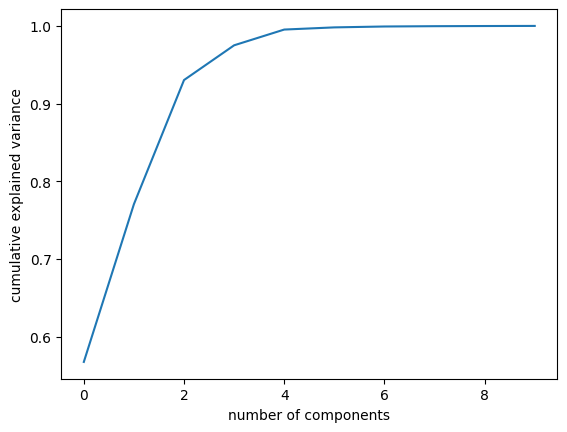

In [6]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [8]:



X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)


In [9]:
y_test.shape

(4600,)

In [10]:
X_calib.shape

NameError: name 'X_calib' is not defined

In [11]:
y_train.shape

(13800,)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

from mapie.classification import MapieClassifier



model = LogisticRegression(random_state=0).fit(X_train, y_train)

cp = MapieClassifier(estimator=model, cv="prefit", method="mondrian")
cp.fit(X_cal, y_cal)
y_pred, y_set = cp.predict(X_test, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred)
print(pd.DataFrame(cm9))

   0     1
0  7  4356
1  0   237


In [13]:
y_pred, y_set = cp.predict(X_test, alpha=0.05)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred)
print(pd.DataFrame(cm9))
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels, y_pred)

   0     1
0  7  4356
1  0   237


0.05304347826086957

In [14]:
y_pred, y_set = cp.predict(X_test, alpha=0.1)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred)
print(pd.DataFrame(cm9))
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels, y_pred)

   0     1
0  7  4102
1  0   491


0.1082608695652174

# Actual Code

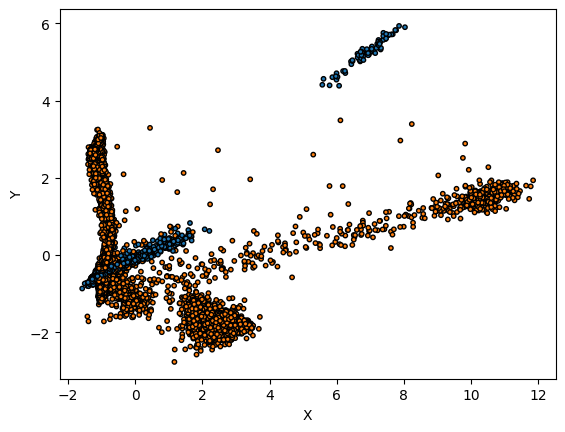

In [15]:
colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
y_train_col = list(map(colors.get, y_train))
fig = plt.figure()
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    color=y_train_col,
    marker='o',
    s=10,
    edgecolor='k'
)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba_max = np.max(y_pred_proba, axis=1)
mapie_score = MapieClassifier(estimator=clf, cv="prefit", method="mondrian")
mapie_score.fit(X_cal, y_cal)
alpha = [0.2, 0.1, 0.05]
y_pred_score, y_ps_score = mapie_score.predict(X_test, alpha=alpha)


In [17]:
def plot_scores(n, alphas, scores, quantiles):
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
    plt.figure(figsize=(7, 5))
    plt.hist(scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=400,
            color=colors[i],
            ls="dashed",
            label=f"alpha = {alphas[i]}"
        )
    plt.title("Distribution of scores")
    plt.legend(loc='upper left')
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

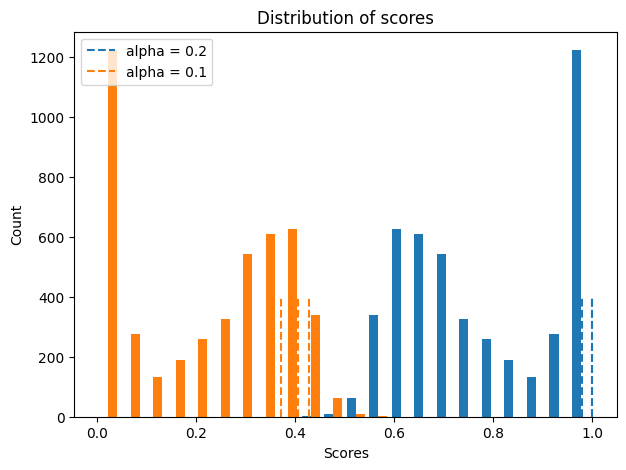

In [18]:
scores = mapie_score.conformity_scores_
n = len(mapie_score.conformity_scores_)
quantiles = mapie_score.quantiles_
plot_scores(n, alpha, scores, quantiles)

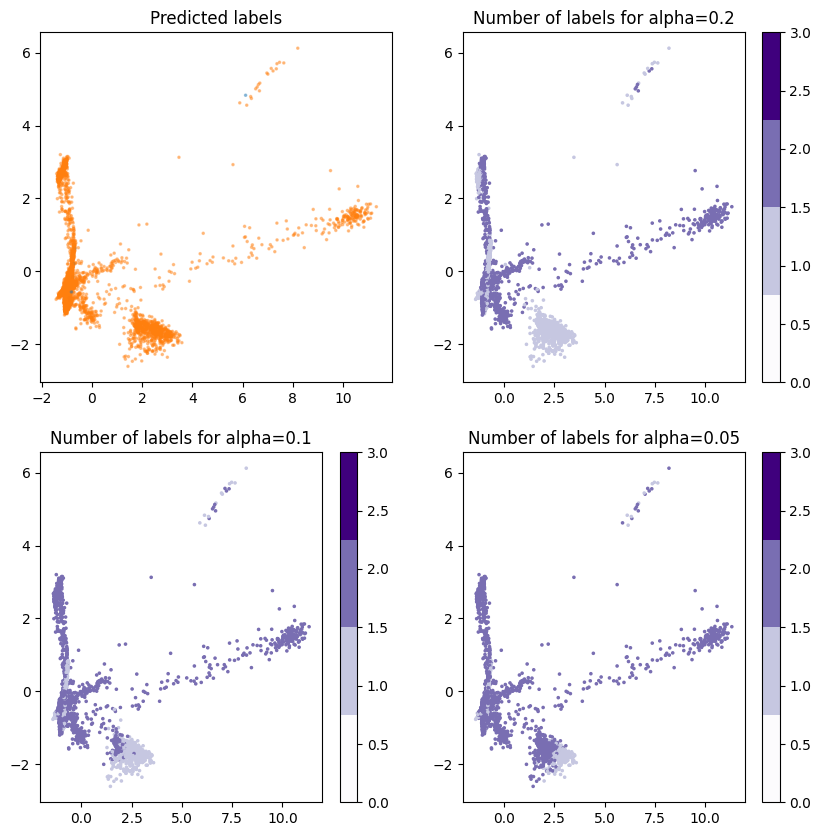

In [19]:

def plot_results(alphas, X, y_pred, y_ps):
    tab10 = plt.cm.get_cmap('Purples', 4)
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
    y_pred_col = list(map(colors.get, y_pred))
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))
    axs = {0: ax1, 1: ax2, 2:  ax3, 3: ax4}
    axs[0].scatter(
        X[:, 0],
        X[:, 1],
        color=y_pred_col,
        marker='.',
        s=10,
        alpha=0.4
    )
    axs[0].set_title("Predicted labels")
    for i, alpha in enumerate(alphas):
        y_pi_sums = y_ps[:, :, i].sum(axis=1)
        num_labels = axs[i+1].scatter(
            X[:, 0],
            X[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        plt.colorbar(num_labels, ax=axs[i+1])
        axs[i+1].set_title(f"Number of labels for alpha={alpha}")
    plt.show()


plot_results(alpha, X_test, y_pred_score, y_ps_score)

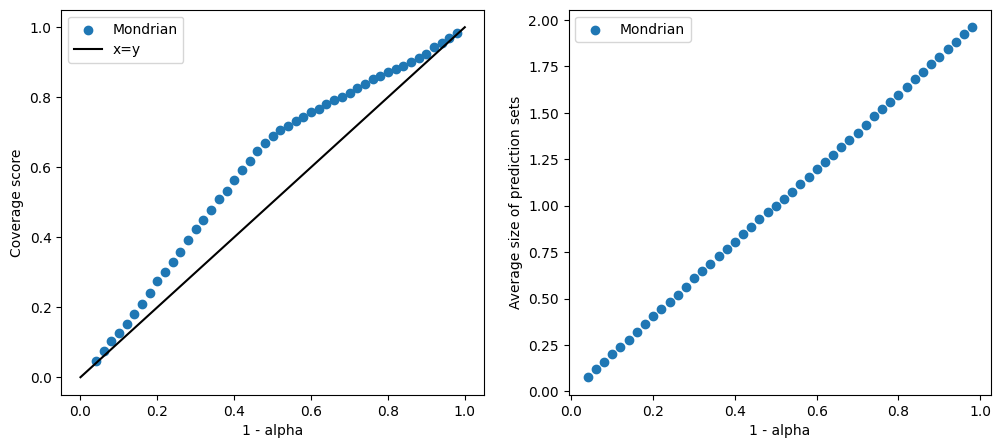

In [20]:
alpha2 = np.arange(0.02, 0.98, 0.02)
_, y_ps_score2 = mapie_score.predict(X_test, alpha=alpha2)
coverages_score = [
    classification_coverage_score(y_test, y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]
widths_score = [
    classification_mean_width_score(y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]


def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(1 - alpha, coverage, label=method)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].plot([0, 1], [0, 1], label="x=y", color="black")
    axs[0].legend()
    axs[1].scatter(1 - alpha, width, label=method)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of prediction sets")
    axs[1].legend()
    plt.show()


plot_coverages_widths(alpha2, coverages_score, widths_score, "Mondrian")

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [22]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [23]:
from sklearn.metrics import confusion_matrix
# Check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", (y_pred == y_test).mean())
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))

Accuracy: 0.7789130434782608
   0     1
0  1  1011
1  6  3582


In [24]:
#Allowed values are 'mondrian', score', 'cumulated_score', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="mondrian")
cp.fit(X_cal, y_cal)
y_pred1, y_set = cp.predict(X_test, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

   0     1
0  7  4102
1  0   491


In [25]:
# Setting the alpha so that we get 95% prediction sets
alpha = 0.05
# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
qhat = np.quantile(scores, q_level)

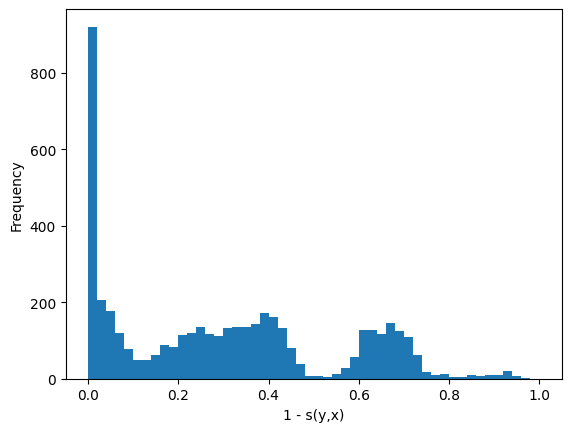

In [26]:
import matplotlib.pyplot as plt
# Get the "probabilities" from the model
predictions = model.predict_proba(X_cal)
# Get for each instance the actual probability of ground truth
prob_for_true_class = predictions[np.arange(len(y_cal)),y_cal]
# Create a histogram
plt.hist(1 - prob_for_true_class, bins=50, range=(0, 1))
# Add a title and labels
plt.xlabel("1 - s(y,x)")
plt.ylabel("Frequency")
plt.show()

In [27]:
prediction_sets = (1 - model.predict_proba(X_test) <= qhat)

In [28]:
prediction_sets

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [29]:
#Allowed values are 'mondrian', score', 'cumulated_score', 'raps', 'naive' or 'top_k'
from mapie.classification import MapieClassifier
cp = MapieClassifier(estimator=model, cv="prefit", method="mondrian")
cp.fit(X_cal, y_cal)
y_pred1, y_set = cp.predict(X_test, alpha=0.9)
y_set = np.squeeze(y_set)
rounded_labels=np.argmax(y_set, axis=1)
cm9 = confusion_matrix(rounded_labels, y_pred1)
print(pd.DataFrame(cm9))

   0     1
0  7  4102
1  0   491


In [30]:
# first count number of classes per bean
set_sizes = y_set.sum(axis=1)
# use pandas to compute how often each size occurs
print(pd.Series(set_sizes).value_counts())

0    3671
1     929
dtype: int64


In [31]:
set_sizes

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
y_pred, y_set = cp.predict(X_test, alpha=0.05)
# remove the 1-dim dimension
y_set = np.squeeze(y_set)
# first count number of classes per bean
set_sizes = y_set.sum(axis=1)
# use pandas to compute how often each size occurs
print(pd.Series(set_sizes).value_counts())

2    4162
1     438
dtype: int64


#CP

In [33]:
cov = classification_coverage_score(y_test, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print('Avg. set size: {:.2f}'.format(setsize))

Coverage: 96.37%
Avg. set size: 1.90


In [34]:
mapie_score = MapieClassifier(model, cv='prefit', method='mondrian')
mapie_score.fit(X_cal, y_cal)
y_pred, y_set = mapie_score.predict(X_test, alpha=0.05)
y_set = np.squeeze(y_set)

In [35]:
cov = classification_coverage_score(y_test, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print("Avg. set size: {:.2f}".format(setsize))

Coverage: 96.37%
Avg. set size: 1.90


In [36]:
from sklearn.metrics import confusion_matrix
# Check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", (y_pred == y_test).mean())
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm))

Accuracy: 0.7789130434782608
   0     1
0  1  1011
1  6  3582


In [37]:
from typing import Any, Dict, List, Optional, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from typing_extensions import TypedDict

from mapie._typing import NDArray
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)

In [38]:
kf = KFold(n_splits=5, shuffle=True)
clfs, mapies, y_preds, y_ps_mapies = {}, {}, {}, {}
methods = ["mondrian"]
alpha = np.arange(0.01, 1, 0.01)
for method in methods:
    clfs_, mapies_, y_preds_, y_ps_mapies_ = {}, {}, {}, {}
    for fold, (train_index, calib_index) in enumerate(kf.split(X_train)):
        clf = GaussianNB().fit(X_train[train_index], y_train[train_index])
        clfs_[fold] = clf
        mapie = MapieClassifier(estimator=clf, cv="prefit", method=method)
        mapie.fit(X_train[calib_index], y_train[calib_index])
        mapies_[fold] = mapie
        y_pred_mapie, y_ps_mapie = mapie.predict(
            X_test, alpha=alpha, include_last_label="randomized"
        )
        y_preds_[fold], y_ps_mapies_[fold] = y_pred_mapie, y_ps_mapie
    clfs[method], mapies[method], y_preds[method], y_ps_mapies[method] = (
        clfs_, mapies_, y_preds_, y_ps_mapies_
    )

In [39]:
def plot_results(
        mapies: Dict[int, Any],
        X_test: NDArray,
        X_test2: NDArray,
        y_test2: NDArray,
        alpha: float,
        method: str
) -> None:
    tab10 = plt.cm.get_cmap('Purples', 4)
    fig, axs = plt.subplots(1, len(mapies), figsize=(20, 4))
    for i, (_, mapie) in enumerate(mapies.items()):
        y_pi_sums = mapie.predict(
            X_test,
            alpha=alpha,
            include_last_label=True
        )[1][:, :, 0].sum(axis=1)
        axs[i].scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        coverage = classification_coverage_score(
            y_test2, mapie.predict(X_test2, alpha=alpha)[1][:, :, 0]
        )
        axs[i].set_title(f"coverage = {coverage:.3f}")
    plt.suptitle(
        "Number of labels in prediction sets "
        f"for the {method} method"
    )
    plt.show()

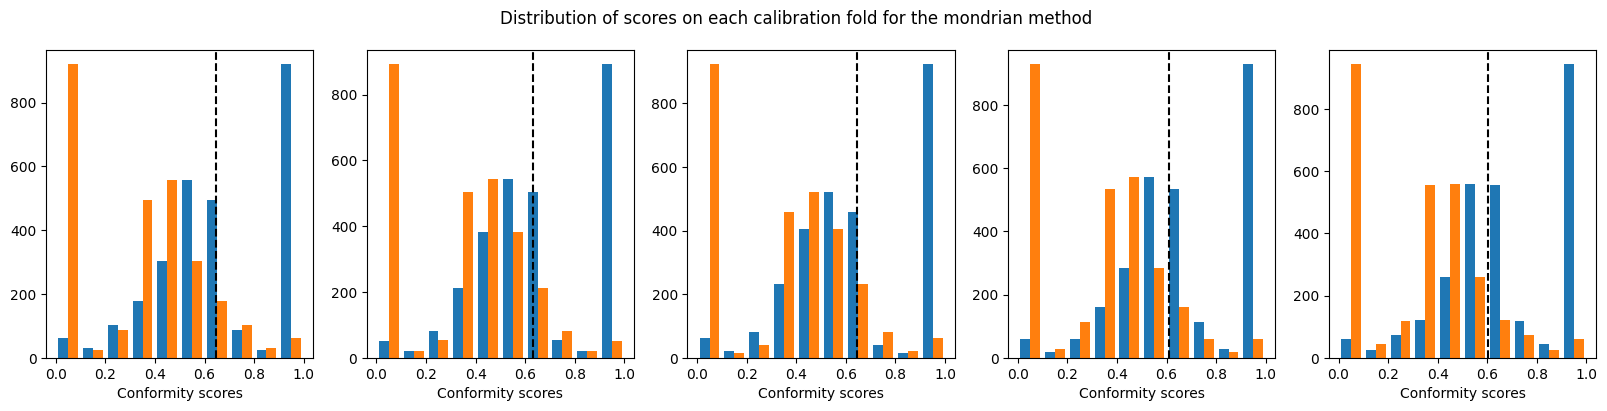

In [54]:
fig, axs = plt.subplots(1, len(mapies["mondrian"]), figsize=(20, 4))
for i, (key, mapie) in enumerate(mapies["mondrian"].items()):
    axs[i].set_xlabel("Conformity scores")
    axs[i].hist(mapie.conformity_scores_)
    axs[i].axvline(mapie.quantiles_[1], ls="--", color="k")
    #axs[i].set_title(f"split={key}\nquantile={mapie.quantiles_[4]}")
plt.suptitle(
    "Distribution of scores on each calibration fold for the "
    f"{methods[0]} method"
)
plt.show()

In [41]:
def plot_results(
        mapies: Dict[int, Any],
        X_test: NDArray,
        X_test2: NDArray,
        y_test2: NDArray,
        alpha: float,
        method: str
) -> None:
    tab10 = plt.cm.get_cmap('Purples', 4)
    fig, axs = plt.subplots(1, len(mapies), figsize=(20, 4))
    for i, (_, mapie) in enumerate(mapies.items()):
        y_pi_sums = mapie.predict(
            X_test,
            alpha=alpha,
            include_last_label=True
        )[1][:, :, 0].sum(axis=1)
        axs[i].scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        coverage = classification_coverage_score(
            y_test2, mapie.predict(X_test2, alpha=alpha)[1][:, :, 0]
        )
        axs[i].set_title(f"coverage = {coverage:.3f}")
    plt.suptitle(
        "Number of labels in prediction sets "
        f"for the {method} method"
    )
    plt.show()

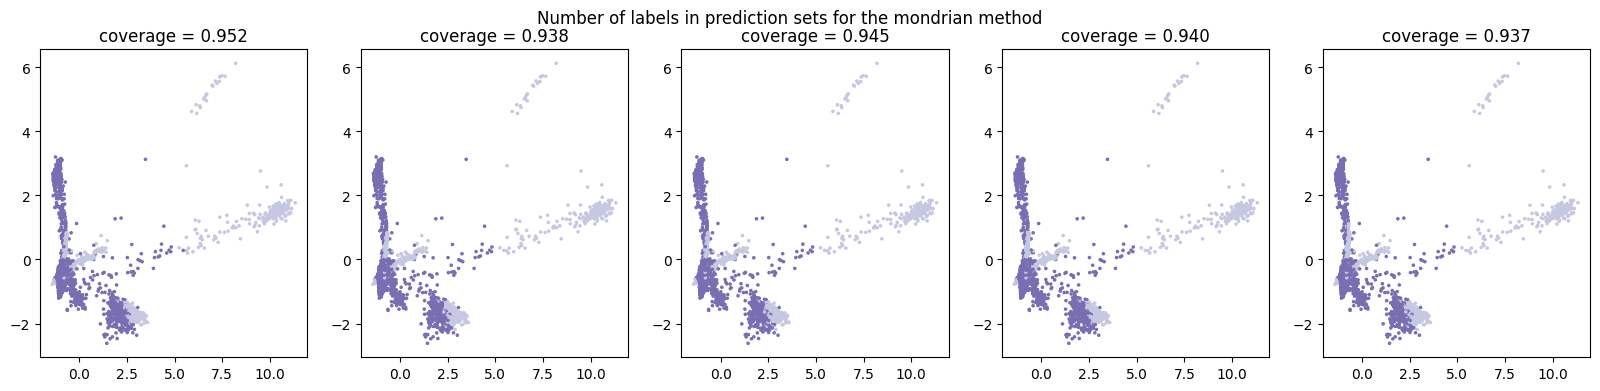

In [55]:
plot_results(
    mapies["mondrian"],
    X_test,
    X_test,
    y_test,
    alpha[9],
    "mondrian"
)



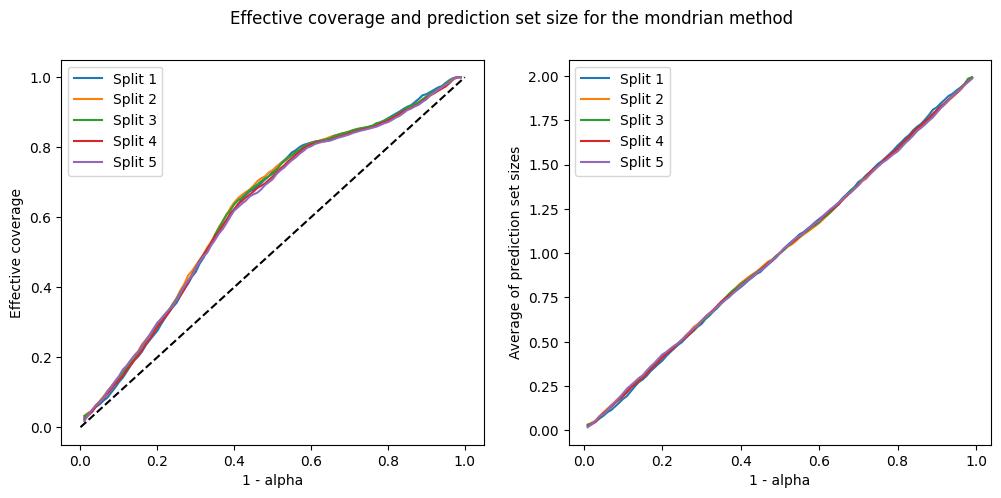

In [56]:
def plot_coverage_width(
        alpha: NDArray,
        coverages: List[NDArray],
        widths: List[NDArray],
        method: str,
        comp: str = "split"
) -> None:
    if comp == "split":
        legends = [f"Split {i + 1}" for i, _ in enumerate(coverages)]
    else:
        legends = ["Mean", "Crossval"]
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_xlabel("1 - alpha")
    axes[0].set_ylabel("Effective coverage")
    for i, coverage in enumerate(coverages):
        axes[0].plot(1 - alpha, coverage, label=legends[i])
    axes[0].plot([0, 1], [0, 1], ls="--", color="k")
    axes[0].legend()
    axes[1].set_xlabel("1 - alpha")
    axes[1].set_ylabel("Average of prediction set sizes")
    for i, width in enumerate(widths):
        axes[1].plot(1 - alpha, width, label=legends[i])
    axes[1].legend()
    plt.suptitle(
        "Effective coverage and prediction set size "
        f"for the {method} method"
    )
    plt.show()


split_coverages = np.array(
    [
        [
            [
                classification_coverage_score(
                    y_test, y_ps[:, :, ia]
                ) for ia, _ in enumerate(alpha)]
            for _, y_ps in y_ps2.items()
        ] for _, y_ps2 in y_ps_mapies.items()
    ]
)

split_widths = np.array(
    [
        [
            [
                classification_mean_width_score(y_ps[:, :, ia])
                for ia, _ in enumerate(alpha)
            ]
            for _, y_ps in y_ps2.items()
        ] for _, y_ps2 in y_ps_mapies.items()
    ]
)

plot_coverage_width(
    alpha, split_coverages[0], split_widths[0], "mondrian"
)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

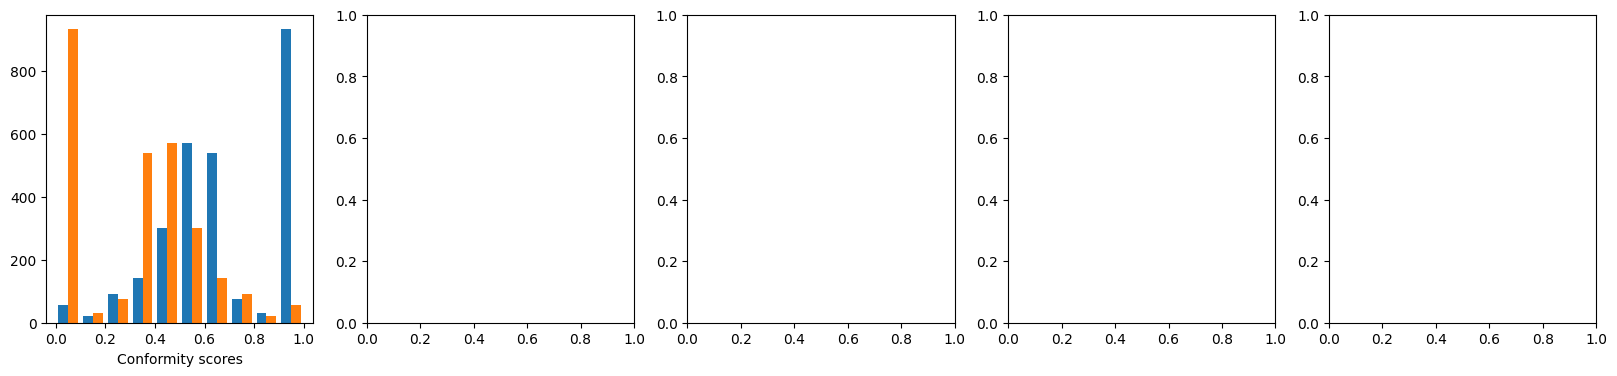

In [62]:
kf = KFold(n_splits=5, shuffle=True)
clfs, mapies, y_preds, y_ps_mapies = {}, {}, {}, {}
methods = ["mondrian"]
alpha = np.arange(0.01, 1, 0.01)
for method in methods:
    clfs_, mapies_, y_preds_, y_ps_mapies_ = {}, {}, {}, {}
    for fold, (train_index, calib_index) in enumerate(kf.split(X_train)):
        clf = GaussianNB().fit(X_train[train_index], y_train[train_index])
        clfs_[fold] = clf
        mapie = MapieClassifier(estimator=clf, cv="prefit", method=method)
        mapie.fit(X_train[calib_index], y_train[calib_index])
        mapies_[fold] = mapie
        y_pred_mapie, y_ps_mapie = mapie.predict(
            X_test, alpha=alpha, include_last_label="randomized"
        )
        y_preds_[fold], y_ps_mapies_[fold] = y_pred_mapie, y_ps_mapie
    clfs[method], mapies[method], y_preds[method], y_ps_mapies[method] = (
        clfs_, mapies_, y_preds_, y_ps_mapies_
    )

fig, axs = plt.subplots(1, len(mapies["mondrian"]), figsize=(20, 4))
for i, (key, mapie) in enumerate(mapies["mondrian"].items()):
    axs[i].set_xlabel("Conformity scores")
    axs[i].hist(mapie.conformity_scores_)
    axs[i].axvline(mapie.quantiles_[1], ls="--", color="k")
    #axs[i].set_title(f"split={key}\nquantile={mapie.quantiles_[1]:.3f}")

#plt.suptitle("Distribution of scores on each calibration fold for the "f"{methods[0]} method")
plt.show()


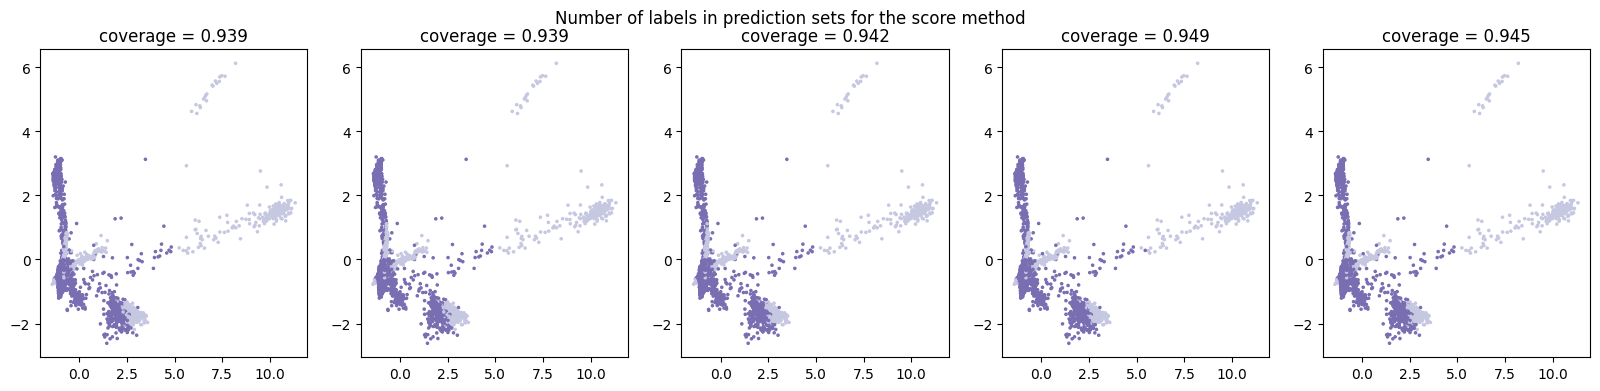

In [59]:

def plot_results(
    mapies: Dict[int, Any],
    X_test: NDArray,
    X_test2: NDArray,
    y_test2: NDArray,
    alpha: float,
    method: str
) -> None:
    tab10 = plt.cm.get_cmap('Purples', 4)
    fig, axs = plt.subplots(1, len(mapies), figsize=(20, 4))
    for i, (_, mapie) in enumerate(mapies.items()):
        y_pi_sums = mapie.predict(
            X_test,
            alpha=alpha,
            include_last_label=True
        )[1][:, :, 0].sum(axis=1)
        axs[i].scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        coverage = classification_coverage_score(
            y_test2, mapie.predict(X_test2, alpha=alpha)[1][:, :, 0]
        )
        axs[i].set_title(f"coverage = {coverage:.3f}")
    plt.suptitle(
        "Number of labels in prediction sets "
        f"for the {method} method"
    )
    plt.show()

plot_results(
    mapies["mondrian"],
    X_test,
    X_test,
    y_test,#distribution
    alpha[9],
    "score"
)






In [58]:
#end